# Imports

In [17]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mtick

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from grouping import Grouping
import plotter

output_dir = "../outputs/het_analysis_wrt_time_dp/"
SAVE = True

# %matplotlib widget

# Data input and cleaning

In [18]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook

assay = pd.read_csv("../data/ptfi_1/dmlz_assay.csv")
assay['Tons_Sampling'] = assay['Tons_Sampling'].astype(float)

rename_cols = list(assay.columns)[7:-1]
for col in rename_cols:
    assay = assay.rename(columns={col: col.split('_')[0].upper()})

In [19]:
# Load and clean this data so that we can graph locations later

FILE_LOC = '../data/ptfi_1/'
FILE_NAME = 'DP_block_grade estimates_actual tons_dp coordinate.xlsx'

dp_coords = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='DP_Coordinates')

dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

In [20]:
assay

,SAMPLEID,HOLEID,DATESAMPLED,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
0,P14-10W_20201002,P14-10W,02-Oct-20,O,U010007,NaN,28.335,1.48,0.72,4.25,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
1,P14-11E_20201002,P14-11E,02-Oct-20,O,U010008,NaN,29.650,1.09,1.29,3.99,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
2,P14-11W_20201002,P14-11W,02-Oct-20,O,U010009,NaN,31.135,2.73,1.61,9.87,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
3,P14-12W_20201002,P14-12W,02-Oct-20,O,U010011,NaN,30.450,2.55,1.45,6.05,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
4,P14-13W_20201002,P14-13W,02-Oct-20,O,U010012,NaN,32.710,3.70,2.39,12.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,P23-14E_20221030,P23-14E,30-Oct-22,O,U035047,1374.649920,26.414,0.33,0.48,3.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22377,P24-02E_20221030,P24-02E,30-Oct-22,O,U035048,638.551200,30.239,1.98,1.29,42.00,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22378,P25-10W_20221030,P25-10W,30-Oct-22,O,U035049,910.884073,26.490,0.51,0.56,3.23,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22379,P25-11W_20221030,P25-11W,30-Oct-22,O,U035050,1443.214367,26.995,0.46,0.44,2.36,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual


Take the repeated `SAMPLEID` values and combine them as they shouldn't be treated as independent values

In [21]:
idxs = [
    [16209, 16210],
    [18704, 18705],
    [18739, 18740]
]
assay.iloc[np.array(idxs).flatten()]

,SAMPLEID,HOLEID,DATESAMPLED,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
16209,P16-03E_20220529,P16-03E,29-May-22,O,U028311,826.594225,21.980,0.98,0.25,3.85,0.08,0.04,NaN,NaN,NaN,NaN,NaN,NaN,Manual
16210,P16-03E_20220529,P16-03E,29-May-22,O,U028312,826.594225,10.003,0.71,0.33,6.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18704,P20-14W_20220808,P20-14W,08-Aug-22,O,U031029,3351.270720,19.980,0.27,0.35,0.71,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18705,P20-14W_20220808,P20-14W,08-Aug-22,O,U031030,3351.270720,10.960,0.28,0.45,0.70,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18739,P14-11E_20220809,P14-11E,09-Aug-22,O,U031069,3217.499413,8.678,1.15,0.25,3.50,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18740,P14-11E_20220809,P14-11E,09-Aug-22,O,U031068,3217.499413,17.634,0.69,0.39,1.40,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual


In [22]:
SAMPLE_WEIGHT = 'SampleWeight'
numeric_cols = list(assay.columns)[7:-1]

# TODO: combine the data from the same samples

# for combine_ids in idxs:
#     w = []
#     sample_data = {}
    
#     for id in combine_ids:
#         row = assay.loc[id]
        
#         w.append(row[SAMPLE_WEIGHT])
#         for col in numeric_cols:
#             if col not in sample_data:
#                 sample_data[col] = [row[col]]
#             else:
#                 sample_data[col].append(row[col])
    
#     combined_sample = {}
            
#     sample = assay.loc[combine_ids[0]].to_dict()
    
#     for id in combine_ids[1:]:
#         sample_add = assay.loc[id]
        
#         for col in numeric_cols:
#             if np.isnan(sample_add[col]):
#                 sample[col] = np.nan
#             else:
#                 sample[col] = (sample[col] * sample[SAMPLE_WEIGHT]) + (sample_add[col] * sample_add[SAMPLE_WEIGHT]) / (sample[SAMPLE_WEIGHT] + sample_add[SAMPLE_WEIGHT])
#         sample[SAMPLE_WEIGHT] += sample_add[SAMPLE_WEIGHT]
    
#     assay = assay.drop(axis=0, index=combine_ids)
#     df_dictionary = pd.DataFrame([sample])
#     assay = pd.concat([assay, df_dictionary], ignore_index=True)


In [23]:
assay

,SAMPLEID,HOLEID,DATESAMPLED,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
0,P14-10W_20201002,P14-10W,02-Oct-20,O,U010007,NaN,28.335,1.48,0.72,4.25,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
1,P14-11E_20201002,P14-11E,02-Oct-20,O,U010008,NaN,29.650,1.09,1.29,3.99,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
2,P14-11W_20201002,P14-11W,02-Oct-20,O,U010009,NaN,31.135,2.73,1.61,9.87,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
3,P14-12W_20201002,P14-12W,02-Oct-20,O,U010011,NaN,30.450,2.55,1.45,6.05,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
4,P14-13W_20201002,P14-13W,02-Oct-20,O,U010012,NaN,32.710,3.70,2.39,12.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,P23-14E_20221030,P23-14E,30-Oct-22,O,U035047,1374.649920,26.414,0.33,0.48,3.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22377,P24-02E_20221030,P24-02E,30-Oct-22,O,U035048,638.551200,30.239,1.98,1.29,42.00,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22378,P25-10W_20221030,P25-10W,30-Oct-22,O,U035049,910.884073,26.490,0.51,0.56,3.23,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22379,P25-11W_20221030,P25-11W,30-Oct-22,O,U035050,1443.214367,26.995,0.46,0.44,2.36,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual


# Group and Output

## Test

### Group

In [24]:
dhid = 'P20-10E'
dp_timeslices = {}

weights = draw_tons.loc[dhid].dropna()
dates = weights.index.to_list()

cu_grades = cu_pcbc.loc[dhid][dates]
au_grades = au_pcbc.loc[dhid][dates]

for date in dates:
    if weights.isnull().all():
        print(f"No data for {dhid}")
    else:
        dp_timeslices[date] = Grouping(date)
        # Add CU
        dp_timeslices[date].add_resource("CU", weights[:date], cu_grades[:date])

NameError: name 'draw_tons' is not defined

In [ ]:
w, h, g = [], [], []
for date, timeslice in dp_timeslices.items():
    w.append(timeslice.resources['CU'].get_cml_weight())
    h.append(timeslice.resources['CU'].get_heterogeneity())
    g.append(timeslice.resources['CU'].get_grade())

: 

### Output

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot()

ax.plot(w, h, alpha=0.5, c='lightblue', ls='--')
ax.scatter(w, h, c='blue', s=3)

ax.set_xlim(0, max(w))
ax.set_xlabel('Weight')

ax.set_ylim(0)
ax.set_ylabel('Heterogeneity', c='blue')

sec_ax = ax.twinx()

sec_ax.plot(w, g, alpha=0.2, c='red', ls='--')
sec_ax.scatter(w, g, c='red', s=3)

sec_ax.set_ylabel('Grade', c='red')

ax.set_title(f'{dhid} Grade/Heterogeneity wrt to Weight')

: 

## Grouping

In [ ]:
dhid = 'P20-10E'
assay.query('HOLEID == @dhid').set_index('DATESAMPLED')

,SAMPLEID,HOLEID,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
DATESAMPLED,,,,,,,,,,,,,,,,,,
02-Oct-20,P14-10W_20201002,P14-10W,O,U010007,NaN,28.335,1.48,0.72,4.25,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
13-Oct-20,P14-10W_20201013,P14-10W,O,U010347,NaN,27.570,0.93,0.52,2.92,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
20-Oct-20,P14-10W_20201020,P14-10W,O,U010499,NaN,28.823,1.38,0.97,4.32,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
09-Dec-20,P14-10W_20201209,P14-10W,O,U011719,26.644500,28.059,0.94,0.80,6.94,0.01,0.01,NaN,0.29,3.27,1.43,NaN,NaN,Manual
08-Jan-21,P14-10W_20210108,P14-10W,O,U011970,4449.631500,29.510,2.23,1.50,9.46,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-22,P14-10W_20220925,P14-10W,O,U033185,741.981520,24.696,1.19,0.56,5.28,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
01-Oct-22,P14-10W_20221001,P14-10W,O,U033521,635.984160,28.191,0.46,0.37,4.51,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
11-Oct-22,P14-10W_20221011,P14-10W,O,U034083,990.749088,35.191,1.03,0.35,8.52,0.23,0.19,NaN,NaN,NaN,NaN,NaN,NaN,Manual


In [ ]:
groups = {}
elements = ['CU', 'AU', 'AG']
dhids = assay['HOLEID'].unique()

for dhid in dhids:
    data = assay.query('HOLEID == @dhid').set_index('DATESAMPLED')
    
    weights = data['SampleWeight']
    if data.empty:
        print(f"No data for {dhid}")
    else:
        dp_timeslices = {}
        
        dates = data.index.to_list()
        
        for date in dates:
            ts = dp_timeslices[date] = Grouping(date)
            for element in elements:
                ts.add_resource(element, weights[:date], data[element][:date])
                
        groups[dhid] = dp_timeslices

## Output

Output H-G wrt T Graphs

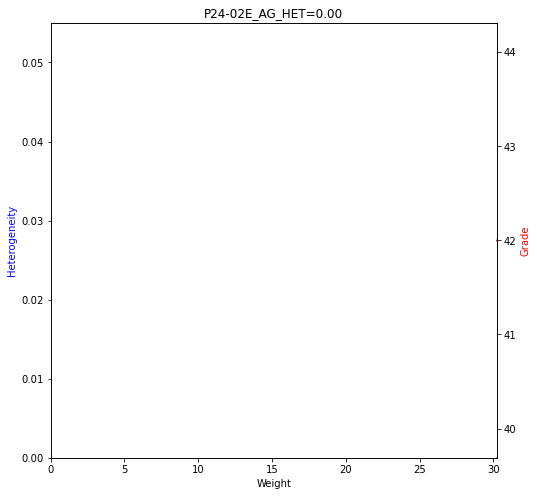

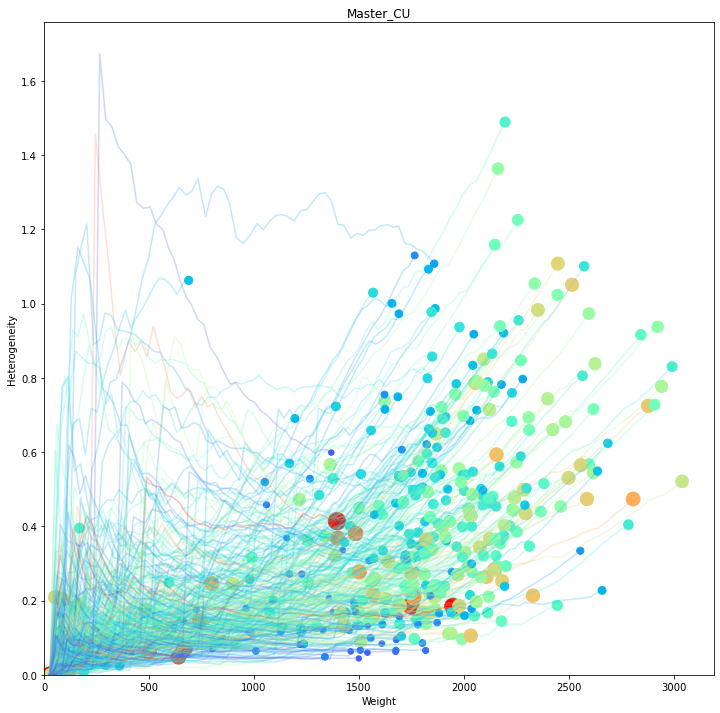

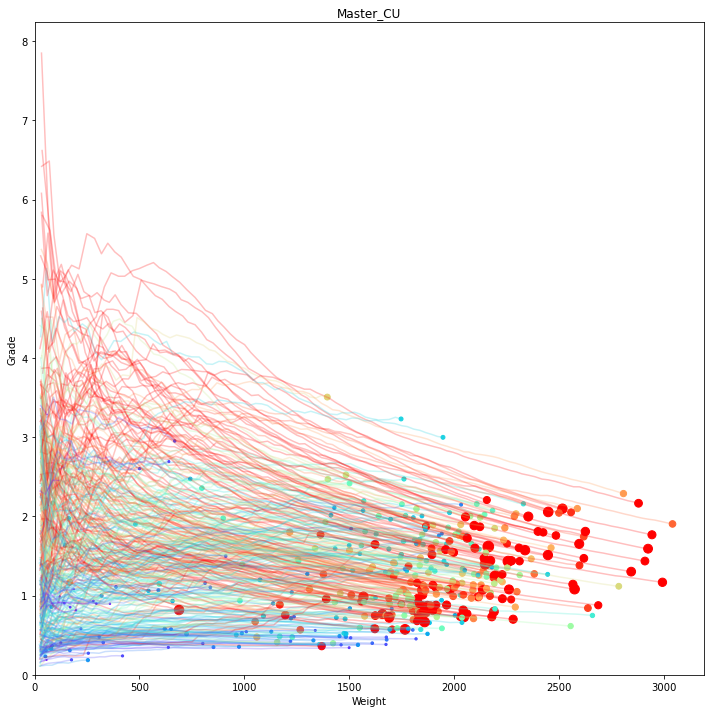

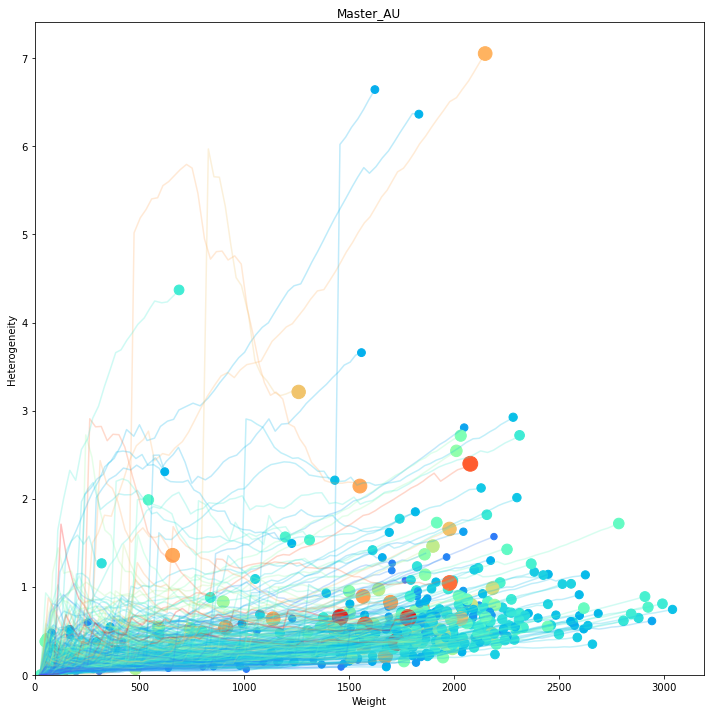

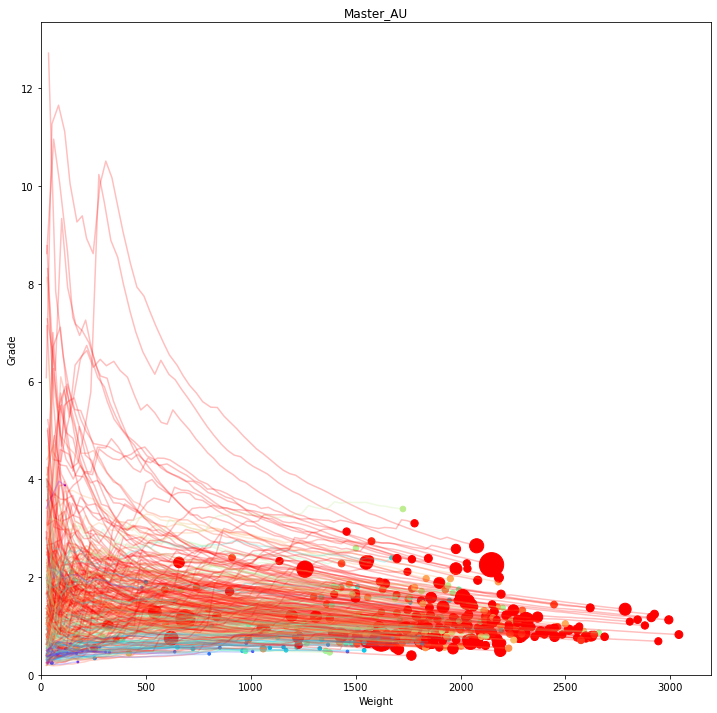

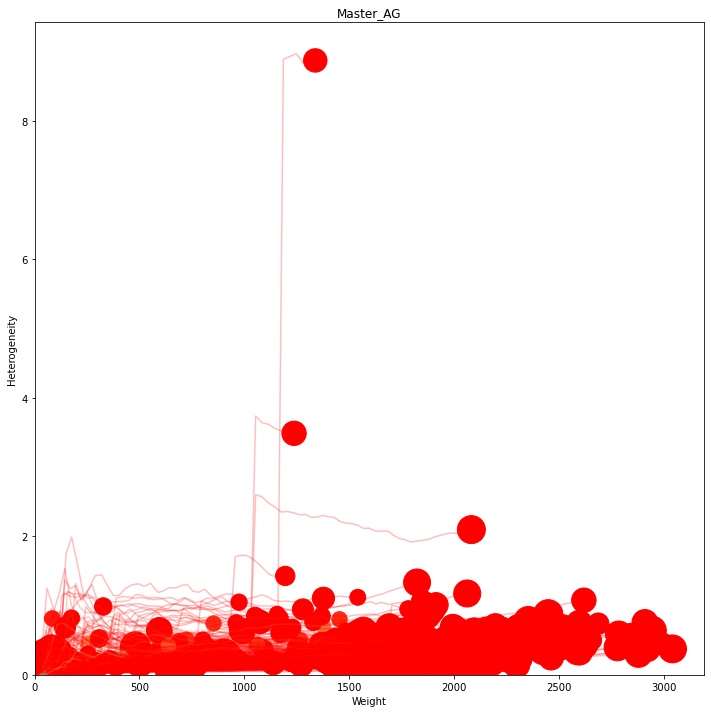

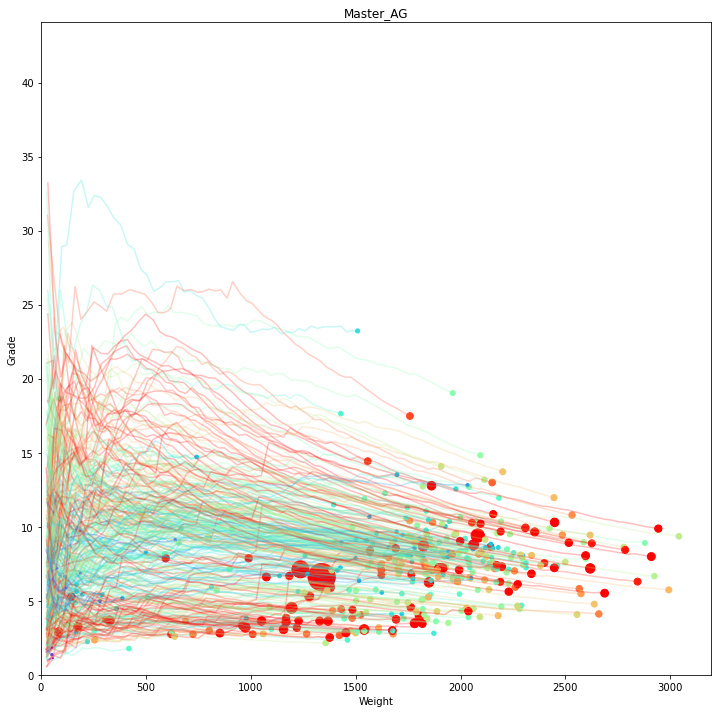

In [ ]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    
    s = 3
    alpha = 0.5
    
    ms = 0.5
    ma = 0.25
    
    cmap = plt.colormaps.get('rainbow')
    g_norm = colors.Normalize(vmin=0.0, vmax=3.0)
    h_norm = colors.Normalize(vmin=0.0, vmax=0.6)
    
    for element in elements:
        hw_master_fig = plt.figure()
        hw_master_fig.set_size_inches(12, 12)
        hw_master_ax = hw_master_fig.add_subplot()
        
        hw_master_ax.set_xlabel('Weight')
        hw_master_ax.set_ylabel('Heterogeneity')
        
        # hw_master_ax.set_facecolor('black')
        hw_master_ax.set_title(f'Master_{element}')
        
        gw_master_fig = plt.figure()
        gw_master_fig.set_size_inches(12, 12)
        gw_master_ax = gw_master_fig.add_subplot()
        
        gw_master_ax.set_xlabel('Weight')
        gw_master_ax.set_ylabel('Grade')
        
        # gw_master_ax.set_facecolor('lightgrey')
        gw_master_ax.set_title(f'Master_{element}')
        
        wf, hf, gf = [], [], []
        
        for dhid, dp_timeslices in groups.items():
            save_loc = output_dir + f'{dhid}/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            
            fig.clear()
            ax = fig.add_subplot()

            w, h, g = [], [], []
            for date, timeslice in dp_timeslices.items():
                if element in timeslice.resources:
                    w.append(timeslice.resources[element].get_cml_weight())
                    h.append(timeslice.resources[element].get_heterogeneity())
                    g.append(timeslice.resources[element].get_grade())
                    
            if len(w) > 0:
                wf.append(w[-1])
                hf.append(h[-1])
                gf.append(g[-1])
            
            if len(w) > 0:
                ax.plot(w, h, alpha=alpha, c='blue', ls='--')
                ax.scatter(w, h, c='blue', s=s)

                ax.set_xlim(0, max(w))
                ax.set_xlabel('Weight')

                ax.set_ylim(0)
                ax.set_ylabel('Heterogeneity', c='blue')

                sec_ax = ax.twinx()

                sec_ax.plot(w, g, alpha=alpha, c='red', ls='--')
                sec_ax.scatter(w, g, c='red', s=s)

                sec_ax.set_ylabel('Grade', c='red')

                ax.set_title(f'{dhid}_{element}_HET={h[-1]:.2f}')
                fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')
                
                # Add to masters
                final_g = g[-1]
                hw_master_ax.plot(w, h, c=cmap(g_norm(final_g)), alpha=ma)
                # hw_master_ax.scatter(w, h, c='black', s=ms, alpha=ma)
                
                final_h = h[-1]
                gw_master_ax.plot(w, g, c=cmap(h_norm(final_h)), alpha=ma)
                # gw_master_ax.scatter(w, g, c='black', s=ms, alpha=ma)
    
        hw_master_ax.scatter(wf, hf, color=cmap(g_norm(gf)), s=100*ms*h_norm(gf))
        
        hw_master_ax.set_xlim(0)
        hw_master_ax.set_ylim(0)
        
        gw_master_ax.scatter(wf, gf, color=cmap(h_norm(hf)), s=100*ms*h_norm(hf))
        
        gw_master_ax.set_xlim(0)
        gw_master_ax.set_ylim(0)
    
        save_loc = output_dir + f'master/'    
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)      
        hw_master_fig.savefig(save_loc + f'hw_master_{element}.svg', format='svg')
        gw_master_fig.savefig(save_loc + f'gw_master_{element}.svg', format='svg')

In [ ]:
# then we want to graph the mass yield curves for all the individual elements
no_of_graphs = len(elements)

if SAVE:
    fig = plt.figure()
    fig.set_size_inches(12, 12)

    s = 0.5
    alpha = 0.4

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()
        ax_sec = ax.twinx()
        
        for dhid, drillhole in groups.items():
            if element in drillhole.resources:
                plotter.scatter_g_r(ax, ax_sec, drillhole.resources[element].get_info(), s=s, alpha=alpha)
                
        plotter.set_g_r_labels(ax, ax_sec, element)
        ax.set_title(f'master_{element}')

        save_loc = output_dir + f'master/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [ ]:
combined_data = Grouping('combined_data')
flat_draw_tons = draw_tons.to_numpy().flatten()
combined_data.add_resource("CU", flat_draw_tons, cu_pcbc.to_numpy().flatten())
combined_data.add_resource("AU", flat_draw_tons, au_pcbc.to_numpy().flatten())

In [ ]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = combined_data.resources[element].get_heterogeneity()
        df = combined_data.resources[element].get_info()
            
        if len(df) > 0:
            ax.set_title(f'combined_{element}_HET={het:.2f}')
            plotter.plot_grade_recovery_curve(ax, df, element)

            save_loc = output_dir + f'combined/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)

# Visualize

In [16]:
dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

In [17]:
for dhid, group in groups.items():
    if dhid not in list(dp_coords.index):
        print('dhid')

In [18]:
hs = {}
for dpid in list(dp_coords.index):
    if dpid not in groups:
        for element in elements:
            if element not in hs:
                hs[element] = []
            hs[element].append(np.nan)
    else:
        dp = groups[dpid]
        for element in elements:
            if element not in hs:
                hs[element] = []
            if element in dp.resources:
                dhr = dp.resources[element]
                hs[element].append(dp.resources[element].get_heterogeneity())
            else:
                hs[element].append(np.nan)

In [19]:
# %matplotlib qt


# fig = plt.figure()
# ax = plt.axes(projection='3d')

# element = 'CU'

# h = np.array(hs[element])

# # ax.scatter3D(
# #     dp_coords['x'], 
# #     dp_coords['y'], 
# #     dp_coords['z'],
# #     s=1,
# #     alpha=0.5,
# #     c='grey'
# # )
# # ax.set_title(element)
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# x, y, z = dp_coords['x'], dp_coords['y'], dp_coords['z']

# col = []
# # cmap = colors.Colormap('viridis')

# import matplotlib
# cmap = matplotlib.cm.get_cmap('viridis')

# ch = np.array(h)
# ch = ch[~np.isnan(ch)]
# percentile90 = np.quantile(ch, 0.97)
# print(percentile90)
# def normalize(i: float):
#     return i / percentile90

# for het in h:
#     if not np.isnan(het):
#         col.append(cmap(normalize(het)))
#     else:
#         col.append((0.7, 0.7, 0.7, 0.1))

# # col = np.where(np.isnan(h), 'red', h)
# # ma_h = np.ma.array(h, mask=np.isnan(h))
# # cmap = plt.get_cmap('viridis').copy()
# # cmap.set_bad('grey',1.)

# p = ax.scatter3D(
#     x, 
#     y,
#     z, 
#     c=col,
#     # cmap=cmap,
#     s=40,
#     alpha=1
# )
# ax.set_title(element)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # ax.set_zlim([2550, 2650])
# fig.colorbar(p)

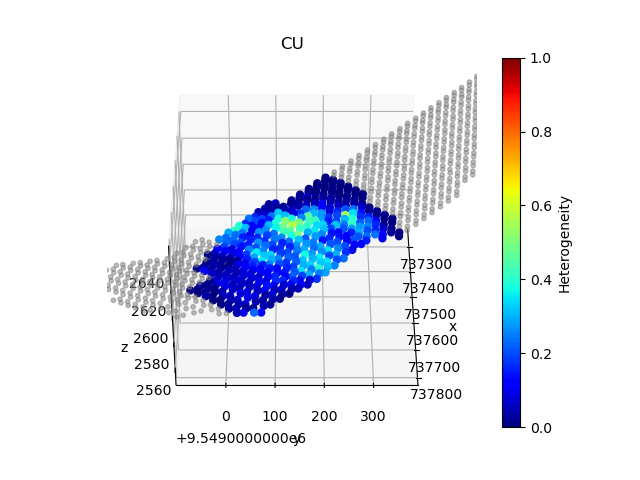

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'CU'

h = np.array(hs[element])
x, y, z = dp_coords['x'], dp_coords['y'], dp_coords['z']

cmap = plt.colormaps.get('winter')
nan = np.argwhere(np.isnan(h))

p = ax.scatter3D(
    x, 
    y,
    z, 
    c=h,
    vmax=1,
    cmap=cmap,
    s=25,
    alpha=1
)

# Set limits to the non-nan values
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.set_zlim([2550, 2650])


nan = np.argwhere(np.isnan(h))
nan = nan.flatten()
ax.scatter3D(
    x[nan], 
    y[nan], 
    z[nan],
    s=10,
    alpha=0.5,
    c='grey'
)

ax.set_title(element)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.azim = 0
ax.elev = 40

# id = 'P08-04W'
# ax.scatter(x[id], y[id], z[id], marker='*', c='red', s=100)

cbar = fig.colorbar(p)
cbar.set_label('Heterogeneity')

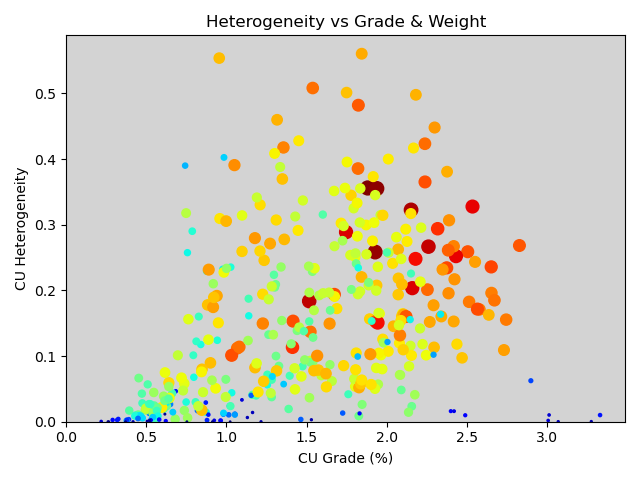

In [21]:
element = 'CU'

x, y, w = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_grade())
    y.append(group.resources[element].get_heterogeneity())
    w.append(group.resources[element].get_cml_weight())
    
max_w = np.max(w)
scaled_w = 1 + (9 * (w / max_w))


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_w**2, c=w, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Grade (%)')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Grade & Weight')
ax.set_facecolor('lightgrey')

fig.tight_layout()

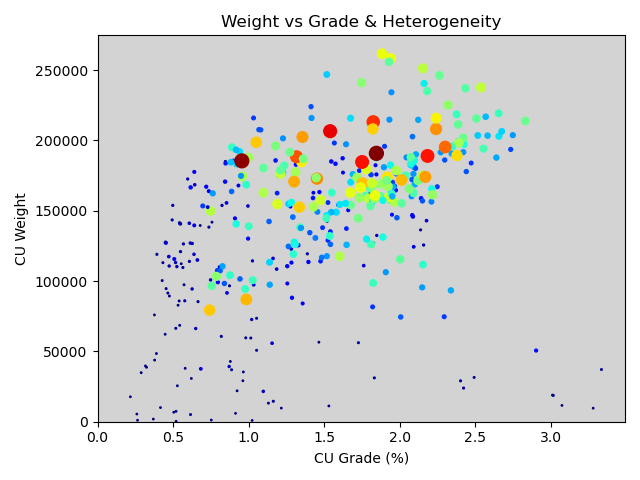

In [22]:
element = 'CU'

x, y, h = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_grade())
    y.append(group.resources[element].get_cml_weight())
    h.append(group.resources[element].get_heterogeneity())
    
max_h = np.max(h)
scaled_h = 1 + (9 * (h / max_h))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_h**2, c=h, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Grade (%)')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Weight')
ax.set_ylim(0, None)

ax.set_title('Weight vs Grade & Heterogeneity')
ax.set_facecolor('lightgrey')

fig.tight_layout()

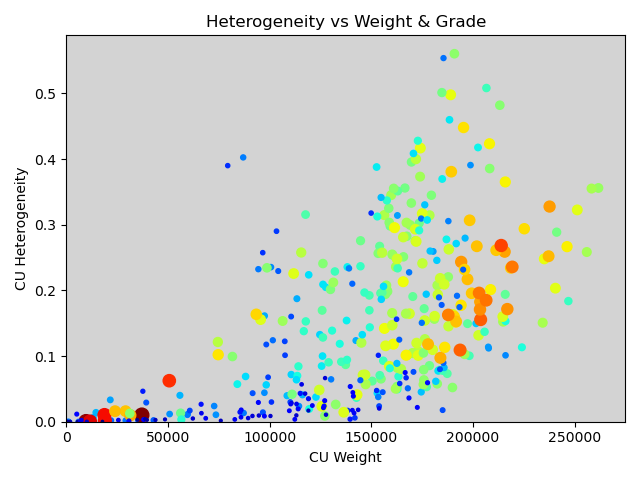

In [23]:
element = 'CU'

x, y, g = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_cml_weight())
    y.append(group.resources[element].get_heterogeneity())
    g.append(group.resources[element].get_grade())
    
max_g = np.max(g)
scaled_g = 1 + (9 * (g / max_g))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_g**2, c=g, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Weight')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Weight & Grade')
ax.set_facecolor('lightgrey')

fig.tight_layout()